## Point to consider before running this notebook:
### Please make sure to give the appropriate path before uploading the files.

In [368]:
import pandas as pd

# Checkpoint 1: Data Cleaning 1

In [369]:
# reading the files to dataframe

companies = pd.read_csv("F:/upgrad/Investment analysis asignment/companies.txt", sep="\t", encoding = "ISO-8859-1")
rounds2 = pd.read_csv("F:/upgrad/Investment analysis asignment/rounds2.csv", encoding = "ISO-8859-1")

In [370]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [371]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [372]:
# finding unique companies in rounds2 data
rounds2.company_permalink.nunique()

90247

In [373]:
rounds2.company_permalink.str.lower().nunique()

66370

The no. of unique comapnies in rounds2 are 66370. lower() ensures all entries under company_permalink are converted to lower case. (lower and upper case links must be considered as one)

In [374]:
#finding unique comapnies in comapnies data
companies.permalink.str.lower().nunique()

66368

In [375]:
# Confirming if there any companies in the rounds2 file which are not present in companies.
#Though the above outputs also verifies the same.
round_temp = pd.DataFrame(rounds2.company_permalink.unique())
company_temp = pd.DataFrame(companies.permalink.unique())
company_temp.equals(round_temp)

False

In [376]:
# Cleaning the fields on which we will be merging the data

companies['permalink'] = companies['permalink'].str.lower()
rounds2['permalink'] = rounds2['company_permalink'].str.lower()

In [377]:
master_frame = pd.merge(rounds2, companies , how='inner', on='permalink')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00",/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00",/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00",/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [378]:
master_frame.shape

(114942, 16)

Total observations present in master_frame are: 114942

In [379]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 16 columns):
company_permalink          114942 non-null object
funding_round_permalink    114942 non-null object
funding_round_type         114942 non-null object
funding_round_code         31139 non-null object
funded_at                  114942 non-null object
raised_amount_usd          94958 non-null float64
permalink                  114942 non-null object
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


# Checkpoint 2: Funding Type Analysis

Before figuring out which investment type is the most suitable, we need to analyse the null values and go ahead with data cleaning accordingly !

In [380]:
#Finding the columns that have missing data

master_frame.isnull().any()

company_permalink          False
funding_round_permalink    False
funding_round_type         False
funding_round_code          True
funded_at                  False
raised_amount_usd           True
permalink                  False
name                        True
homepage_url                True
category_list               True
status                     False
country_code                True
state_code                  True
region                      True
city                        True
founded_at                  True
dtype: bool

In [381]:
# Summing up the missing values, column wise. 

master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

In [382]:
#Calculating the percentage of missing data column wise:

round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
permalink                  0.00
name                       0.00
homepage_url               5.33
category_list              2.96
status                     0.00
country_code               7.54
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.85
dtype: float64

There are so many columns with high prcentage of null values. We can remove the columns that we do not need for this analysis. 

In [383]:
# removing columns that are not needed. 

master_frame = master_frame.drop('funding_round_code',axis=1)
master_frame = master_frame.drop('founded_at',axis=1)
master_frame = master_frame.drop('company_permalink',axis=1) # removing it since it's duplicate with permalink

#Calculating the percentage of missing data column wise, again:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd         17.39
permalink                  0.00
name                       0.00
homepage_url               5.33
category_list              2.96
status                     0.00
country_code               7.54
state_code                 9.52
region                     8.84
city                       8.84
dtype: float64

For now let's keep the remaining columns and remove the NaN valued raised_amount_usd row. Since this the most crucial value for analysis. 

In [384]:
import numpy as np

In [385]:
# removing NaN valued raised_amount_usd rows:

master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]

#Missing data percentage:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
permalink                 0.00
name                      0.00
homepage_url              4.56
category_list             1.10
status                    0.00
country_code              6.16
state_code                8.01
region                    7.42
city                      7.42
dtype: float64

In [386]:
# counting the rows having more than 5 missing values:

len(master_frame[master_frame.isnull().sum(axis=1)>5].index)

191

In [387]:
#calculating % for the same:

100*(len(master_frame[master_frame.isnull().sum(axis=1) > 5].index) / len(master_frame.index))

0.20114155732007835

In [388]:
# Further removing the columns not needed for this analysis:

master_frame = master_frame.drop('homepage_url', axis=1)
master_frame = master_frame.drop('state_code', axis=1)
master_frame = master_frame.drop('region', axis=1)
master_frame = master_frame.drop('city', axis=1)

#Missing data % after cleaning:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
permalink                 0.00
name                      0.00
category_list             1.10
status                    0.00
country_code              6.16
dtype: float64

In [389]:
# Let's check percentage of retaining rows: 

len(master_frame.index)/114942

0.8261384002366411

We are left with approximately 83 % of data. Only category_list and country_code are left with certain percentage of missing values. Let's look through these two attributes and take action accordingly:

In [390]:
master_frame.category_list.describe()

count             93914
unique            23484
top       Biotechnology
freq               7773
Name: category_list, dtype: object

In [391]:
#Let's impute the missing values with "Missing" for category list:

master_frame.loc[pd.isnull(master_frame['category_list']), ['category_list']] = "missing"

In [392]:
master_frame.country_code.describe()

count     89108
unique      134
top         USA
freq      62049
Name: country_code, dtype: object

In [393]:
#Let's impute the missing values with "Unknown" for country code:
master_frame.loc[pd.isnull(master_frame['country_code']), ['country_code']] = "unknown"

In [394]:
#Missing data % after imputing:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
permalink                 0.00
name                      0.00
category_list             0.00
status                    0.00
country_code              0.00
dtype: float64

In [395]:
master_frame.shape

(94958, 9)

After Cleaning we are left with 94958 rows, 9 columns and 0 missing values. 

### Funding Type Analysis:

In [396]:
# calculating the average of different type of investments type

pd.options.display.float_format = '{:,.2f}'.format 
#The values were coming in exponential format before using float_format which becomes quite difficult to understand
# This converts the value into more readable format

master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
post_ipo_debt           168,704,571.82
post_ipo_equity          82,182,493.87
secondary_market         79,649,630.10
private_equity           73,308,593.03
undisclosed              19,242,370.23
debt_financing           17,043,526.02
venture                  11,748,949.13
grant                     4,300,576.34
convertible_note          1,453,438.54
product_crowdfunding      1,363,131.07
angel                       958,694.47
seed                        719,779.62
equity_crowdfunding         538,368.21
non_equity_assistance       411,203.05
Name: raised_amount_usd, dtype: float64

Since Sparks fund is only intereseted in 4 types of funding. Hence restricting our dataframe to those four funding type !

In [397]:
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture','angel','seed','private_equity'])]

In [398]:
# Calculating mean 

master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values()

funding_round_type
seed                719,779.62
angel               958,694.47
venture          11,748,949.13
private_equity   73,308,593.03
Name: raised_amount_usd, dtype: float64

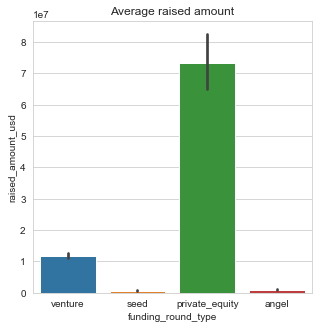

In [399]:
#Average raised amount wrt to funding type

sns.set_style("whitegrid")
plt.figure(figsize=(5,5))

sns.barplot(x='funding_round_type',y='raised_amount_usd',data=master_frame)
plt.title('Average raised amount')

plt.show()

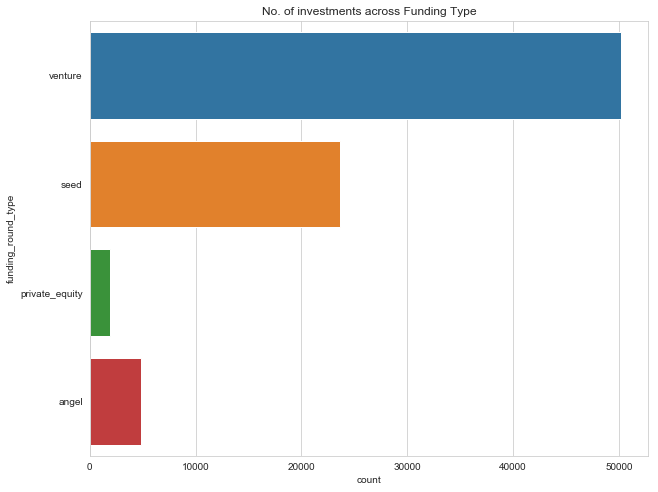

In [400]:
# Plotting count across funding round type:

plt.figure(figsize=(10,8))
sns.countplot(y='funding_round_type',data=master_frame)
plt.title("No. of investments across Funding Type")
plt.show()

The above graph shows that the most invested funding type is "Venture"

### Since Spark Funds wants to invest 5-15 million USD per round investment. Let's analyse the same along with the above graph: 

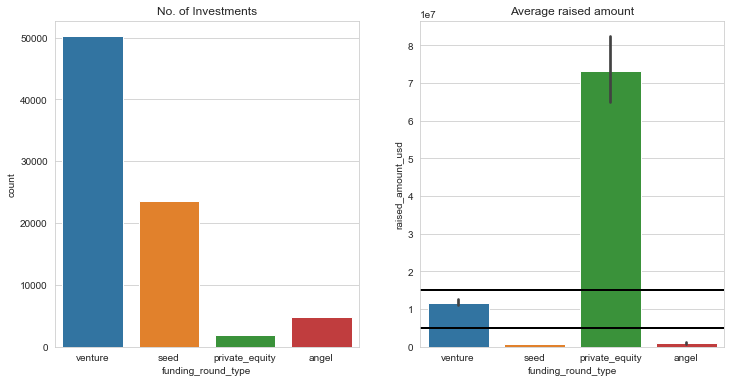

In [401]:
# plot 1 (checkpoint 6)
plt.figure(figsize=(12,6))

# subplot 1 (No. of investments)
plt.subplot(1,2,1)
sns.countplot(x='funding_round_type',data=master_frame)
plt.title("No. of Investments")

# subplot 2 (Average raised amount)
plt.subplot(1,2,2)
sns.barplot(x='funding_round_type',y='raised_amount_usd',data=master_frame)
plt.title("Average raised amount")
# To visulaise the funding type lying between 5-15 million USD, axhline is used
plt.axhline(y=5000000, linewidth=2,color='k')
plt.axhline(y=15000000, linewidth=2,color='k')
plt.show()

### Plot 1 (Checkpoint 6)

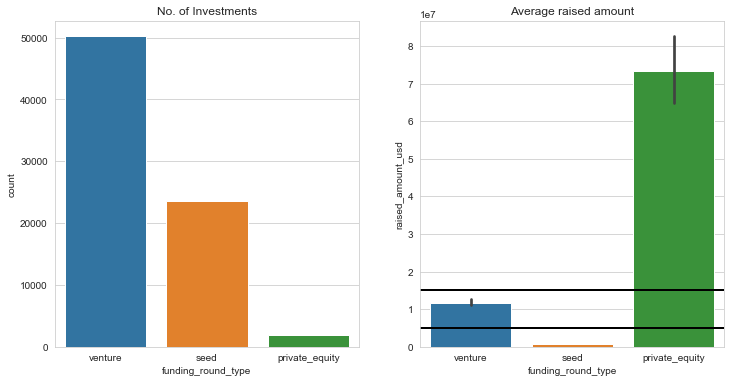

In [402]:
# Since the plot has been asked between venture, seed and private equity: Modifying the above graph to these 3 FT:
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture','seed','private_equity'])]


# plot 1 (checkpoint 6)
plt.figure(figsize=(12,6))

# subplot 1 (No. of investments)
plt.subplot(1,2,1)
sns.countplot(x='funding_round_type',data=master_frame)
plt.title("No. of Investments")

# subplot 2 (Average raised amount)
plt.subplot(1,2,2)
sns.barplot(x='funding_round_type',y='raised_amount_usd',data=master_frame)
plt.title("Average raised amount")
# To visulaise the funding type lying between 5-15 million USD, axhline is used
plt.axhline(y=5000000, linewidth=2,color='k')
plt.axhline(y=15000000, linewidth=2,color='k')
plt.show()

### From the above plots it is visible that the most invested funding type is "Venture" and the amount invested lies withing the Spark Funds range (5-15) million USD. Hence "Venture" Type is the most suitable "Funding Type"

In [403]:
# Restricting our data to only include venture type:

master_frame = master_frame[master_frame['funding_round_type'].isin(['venture'])]

In [404]:
master_frame.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,Media,operating,IND
3,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,"3,406,878.00",/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,unknown
4,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,"2,000,000.00",/organization/0-6-com,0-6.com,Curated Web,operating,CHN
8,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,"719,491.00",/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN
10,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA


In [405]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50228 entries, 0 to 114934
Data columns (total 9 columns):
funding_round_permalink    50228 non-null object
funding_round_type         50228 non-null object
funded_at                  50228 non-null object
raised_amount_usd          50228 non-null float64
permalink                  50228 non-null object
name                       50228 non-null object
category_list              50228 non-null object
status                     50228 non-null object
country_code               50228 non-null object
dtypes: float64(1), object(8)
memory usage: 3.8+ MB


In [406]:
master_frame.describe()

,raised_amount_usd
count,"50,228.00"
mean,"11,748,949.13"
std,"86,352,066.56"
min,0.00
25%,"1,600,901.75"
50%,"5,000,000.00"
75%,"12,000,000.00"
max,"17,600,000,000.00"


# Checkpoint 3: Country Analysis

In [407]:
master_frame.country_code.describe()

count     50228
unique       98
top         USA
freq      36139
Name: country_code, dtype: object

### Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. They want to see the top nine countries.

In [408]:
# finding the top 9 countries in terms of investment:

master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9)

country_code
USA       422,510,842,796.00
CHN        39,835,418,773.00
unknown    25,506,108,414.00
GBR        20,245,627,416.00
IND        14,391,858,718.00
CAN         9,583,332,317.00
FRA         7,259,536,732.00
ISR         6,907,514,579.00
DEU         6,346,959,822.00
Name: raised_amount_usd, dtype: float64

In [409]:
# creating dataframe top9 for top 9 countries identified:

top9 = master_frame[master_frame['country_code'].isin(['USA','CHN','unknown','GBR','IND','CAN','FRA','ISR','DEU'])]

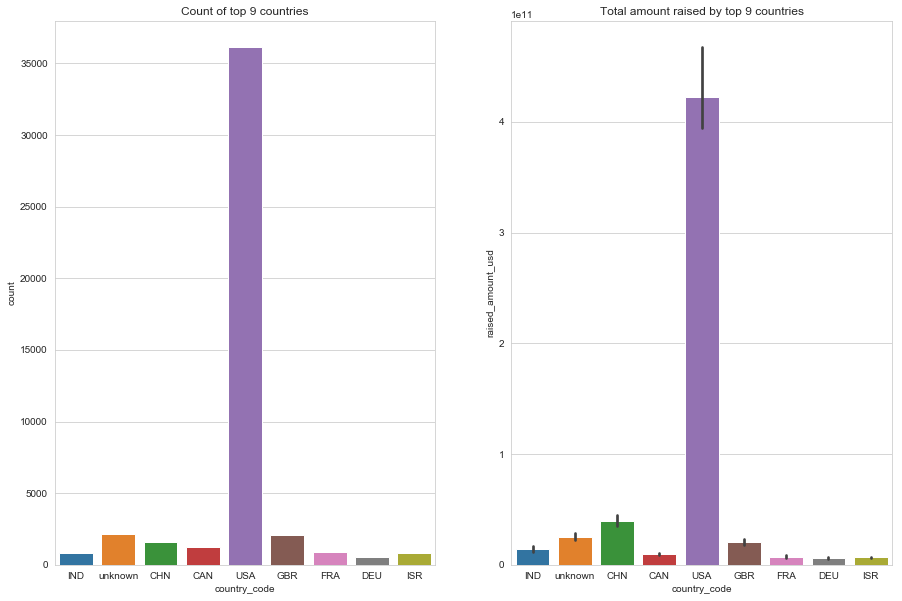

In [410]:
# Plotting sum across top 9 country_code 

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
sns.countplot(x="country_code", data=top9)
plt.title("Count of top 9 countries")
plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd", data=top9, estimator=sum)
plt.title("Total amount raised by top 9 countries")
plt.show()

### Top 3 English speaking countries among the top 9 countries: United States of America(USA), United Kingdom(GBR), India(IND)

In [411]:
#Creating a new data frame with only these 3 countires data for furthur sector wise analysis
master_frame = top9[top9['country_code'].isin(['USA', 'GBR', 'IND'])]

In [412]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39018 entries, 0 to 114929
Data columns (total 9 columns):
funding_round_permalink    39018 non-null object
funding_round_type         39018 non-null object
funded_at                  39018 non-null object
raised_amount_usd          39018 non-null float64
permalink                  39018 non-null object
name                       39018 non-null object
category_list              39018 non-null object
status                     39018 non-null object
country_code               39018 non-null object
dtypes: float64(1), object(8)
memory usage: 3.0+ MB


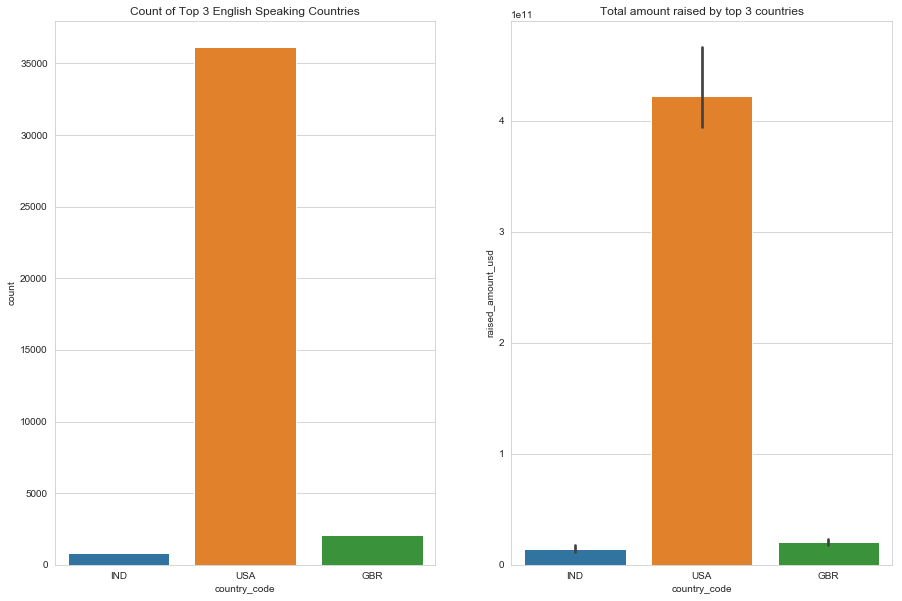

In [413]:
# Plotting sum across top 3 english speaking country among the top 9  
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
sns.countplot(x="country_code", data=master_frame)
plt.title("Count of Top 3 English Speaking Countries")
plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd", data=master_frame, estimator=sum)
plt.title("Total amount raised by top 3 countries")
plt.show()

### Plot 2 (Checkpoint 6)

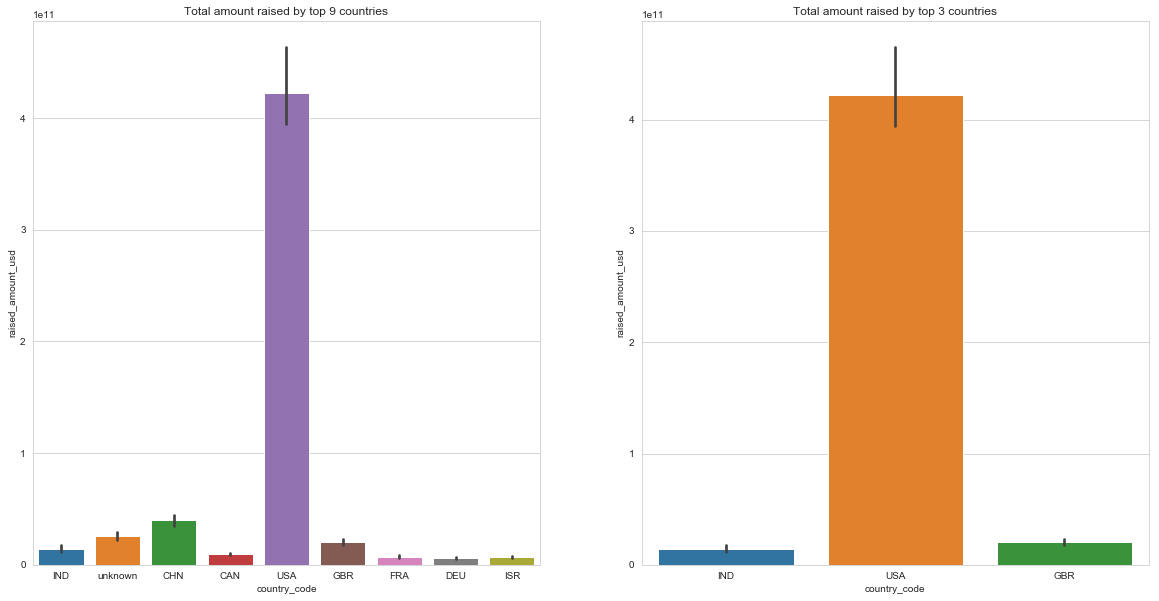

In [414]:
# Plot 2 (Checkpoint 6)
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.barplot(x="country_code", y="raised_amount_usd", data=top9, estimator=sum)
plt.title("Total amount raised by top 9 countries")
plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd", data=master_frame, estimator=sum)
plt.title("Total amount raised by top 3 countries")
plt.show()


# Checkpoint 4: Sector Analysis 1

In [415]:
# function to consider only the first value
def first_value(value):
    values = value.split('|')
    if len(values) > 1:
        return values[0]
    else:
        return value

In [416]:
print(first_value('Application Platforms|Real Time|Social Network Media'))

Application Platforms


In [417]:
master_frame['primary_sector'] = master_frame['category_list'].apply(first_value)
master_frame['primary_sector'] = master_frame['primary_sector'].str.lower()

F:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
F:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [418]:
#LOading mapping file
mapping = pd.read_csv("F:/upgrad/Investment analysis asignment/mapping.csv", encoding = "ISO-8859-1")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [419]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


In [420]:
#Reshaping the mapping dataframe to merge with the masterframe(top 3 english speaking countries data) 
mapping = pd.melt(mapping,id_vars=["category_list"])
mapping = mapping[mapping.value != 0]
mapping.head()

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1


In [421]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 8 to 6167
Data columns (total 3 columns):
category_list    687 non-null object
variable         688 non-null object
value            688 non-null int64
dtypes: int64(1), object(2)
memory usage: 21.5+ KB


In [422]:
# creating new column
mapping = mapping.drop('value', axis=1)
mapping.rename(columns={'variable':'main_sector','category_list':'primary_sector'}, inplace=True)
mapping['primary_sector'] = mapping['primary_sector'].str.lower()


In [423]:
master_frame.shape

(39018, 10)

In [424]:
mapping.primary_sector.sort_values(ascending=True)

1847                 0notechnology
1848    0tural language processing
1849              0tural resources
4602                     0vigation
3441                            3d
3442                   3d printing
3443                 3d technology
5526                      a0lytics
5508                    accounting
2757              active lifestyle
5510                  ad targeting
3447            advanced materials
8                 adventure travel
5513                   advertising
5514         advertising exchanges
5515          advertising networks
5516         advertising platforms
4829                        advice
14                       aerospace
3455                   agriculture
1392         air pollution control
4833                    algorithms
4834                   all markets
4835                  all students
2772           alter0tive medicine
4837                        alumni
5527                       android
4840                        angels
2777                

In [425]:
# function to replace 0 with na in primary sector of mapping
import re
mapping['primary_sector'] = mapping.primary_sector.apply(lambda x: re.sub('[0]', 'na', str(x)))
mapping.primary_sector.sort_values(ascending=True)

3441                                    3d
3442                           3d printing
3443                         3d technology
5508                            accounting
2757                      active lifestyle
5510                          ad targeting
3447                    advanced materials
8                         adventure travel
5513                           advertising
5514                 advertising exchanges
5515                  advertising networks
5516                 advertising platforms
4829                                advice
14                               aerospace
3455                           agriculture
1392                 air pollution control
4833                            algorithms
4834                           all markets
4835                          all students
2772                  alternative medicine
4837                                alumni
5526                             analytics
5527                               android
4840       

In [426]:
master_frame= pd.merge(master_frame, mapping, how='left', on='primary_sector', indicator=True)

master_frame.head()


,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,_merge
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,Media,operating,IND,media,Entertainment,both
1,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising",both
2,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising",both
3,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,"8,900,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising",both
4,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,"5,000,000.00",/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,apps,"News, Search and Messaging",both


In [427]:
master_frame.shape

(39018, 12)

In [428]:
master_frame.head(15)

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,_merge
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,Media,operating,IND,media,Entertainment,both
1,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising",both
2,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising",both
3,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,"8,900,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising",both
4,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,"5,000,000.00",/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,apps,"News, Search and Messaging",both
5,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,"4,000,000.00",/organization/10-minutes-with,10 Minutes With,Education,operating,GBR,education,Others,both
6,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,"2,520,000.00",/organization/1000memories,1000memories,Curated Web,acquired,USA,curated web,"News, Search and Messaging",both
7,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,"265,940.00",/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,curated web,"News, Search and Messaging",both
8,/funding-round/6aeb32ab3fc05db2b606d7a2466e8c09,venture,15-01-2014,"2,906,832.00",/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,curated web,"News, Search and Messaging",both
9,/funding-round/89317984885b44f02e4befb9dc2e588c,venture,01-08-2014,"1,500,000.00",/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,curated web,"News, Search and Messaging",both


In [429]:
# since we did a left join, we can remove all rows that does not have 'both' indicator for required mapping
master_frame = master_frame[master_frame['_merge'] == 'both']
master_frame = master_frame.drop('_merge', axis=1)
master_frame.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,Media,operating,IND,media,Entertainment
1,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
2,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
3,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,"8,900,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
4,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,"5,000,000.00",/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,apps,"News, Search and Messaging"


In [430]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 39017
Data columns (total 11 columns):
funding_round_permalink    38788 non-null object
funding_round_type         38788 non-null object
funded_at                  38788 non-null object
raised_amount_usd          38788 non-null float64
permalink                  38788 non-null object
name                       38788 non-null object
category_list              38788 non-null object
status                     38788 non-null object
country_code               38788 non-null object
primary_sector             38788 non-null object
main_sector                38788 non-null object
dtypes: float64(1), object(10)
memory usage: 3.6+ MB


# Checkpoint 5: Sector Analysis 2

In [431]:
# Dropping all rows whose investment is not between 5 and 15 million
master_frame = master_frame.drop(master_frame[(master_frame.raised_amount_usd < 5000000)].index)
master_frame = master_frame.drop(master_frame[(master_frame.raised_amount_usd > 15000000)].index)

d1 = master_frame[master_frame['country_code'] == 'USA']
d2 = master_frame[master_frame['country_code'] == 'GBR']
d3 = master_frame[master_frame['country_code'] == 'IND']

In [432]:
d1.shape

(12063, 11)

In [433]:
d2.shape

(621, 11)

In [434]:
d3.shape

(328, 11)

### Taking one country dataframe at a time and analysing:

#### D1:

In [435]:
# count
d1.raised_amount_usd.count()

12063

In [436]:
# total amount of investment:
d1.raised_amount_usd.sum()

107757097294.0

In [437]:
# Creating the columns sum and count in d1
d1_agg = d1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
d1 = d1.merge(d1_agg, how='left', on ='main_sector')
d1.head()

F:\python\lib\site-packages\pandas\core\reshape\merge.py:543: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,"8,900,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising","23,807,376,964.00",2714
1,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,"5,000,000.00",/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,apps,"News, Search and Messaging","13,971,567,428.00",1583
2,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,"11,999,347.00",/organization/128-technology,128 Technology,Service Providers|Technology,operating,USA,service providers,Others,"26,321,007,002.00",2950
3,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,"15,000,000.00",/organization/1366-technologies,1366 Technologies,Manufacturing,operating,USA,manufacturing,Manufacturing,"7,258,553,378.00",799
4,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,09-04-2015,"5,000,000.00",/organization/1366-technologies,1366 Technologies,Manufacturing,operating,USA,manufacturing,Manufacturing,"7,258,553,378.00",799


In [438]:
#top sectors based on count of investment
d1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [439]:
# highest investment company wise (Top sector)
d1[d1['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(3)

permalink
/organization/virtustream         64,300,000.00
/organization/capella             54,968,051.00
/organization/airtight-networks   54,201,907.00
Name: raised_amount_usd, dtype: float64

In [440]:
# highest investment company wise (Second Top sector)
d1[d1['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(3)

permalink
/organization/shotspotter   67,933,006.00
/organization/demandbase    63,000,000.00
/organization/intacct       61,800,000.00
Name: raised_amount_usd, dtype: float64

#### D2:

In [441]:
# count
d2.raised_amount_usd.count()

621

In [442]:
# total amount of investment:
d2.raised_amount_usd.sum()

5379078691.0

In [443]:
# Creating the columns sum and count in d2
d2_agg = d2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
d2 = d2.merge(d1_agg, how='left', on ='main_sector')
d2.head()

F:\python\lib\site-packages\pandas\core\reshape\merge.py:543: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,"5,500,000.00",/organization/365scores,365Scores,Android|Apps|iPhone|Mobile|Sports,operating,GBR,android,"Social, Finance, Analytics, Advertising","23,807,376,964.00",2714
1,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,01-01-2008,"8,468,328.00",/organization/7digital,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,content creators,Entertainment,"5,099,197,982.00",591
2,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,19-10-2012,"10,000,000.00",/organization/7digital,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,content creators,Entertainment,"5,099,197,982.00",591
3,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,"15,000,000.00",/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment,"5,099,197,982.00",591
4,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,"5,800,000.00",/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment,"5,099,197,982.00",591


In [444]:
#top sectors based on count of investment
d2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [445]:
# highest investment company wise (Top sector)
d2[d2['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(3)

permalink
/organization/electric-cloud   37,000,000.00
/organization/sensage          36,250,000.00
/organization/enigmatic        32,500,000.00
Name: raised_amount_usd, dtype: float64

In [446]:
# highest investment company wise (Second Top sector)
d2[d2['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(3)

permalink
/organization/celltick-technologies   37,500,000.00
/organization/mythings                34,000,000.00
/organization/zopa                    32,900,000.00
Name: raised_amount_usd, dtype: float64

#### D3:

In [447]:
d3.raised_amount_usd.count()

328

In [448]:
d3.raised_amount_usd.sum()

2949543602.0

In [449]:
# Creating the columns sum and count in d3
d3_agg = d3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
d3 = d3.merge(d1_agg, how='left', on ='main_sector')
d3.head()

F:\python\lib\site-packages\pandas\core\reshape\merge.py:543: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,Media,operating,IND,media,Entertainment,"5,099,197,982.00",591
1,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,"6,369,507.00",/organization/21diamonds-india,21Diamonds,E-Commerce,operating,IND,e-commerce,Others,"26,321,007,002.00",2950
2,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,"6,410,000.00",/organization/a-little-world,A LITTLE WORLD,Finance,operating,IND,finance,"Social, Finance, Analytics, Advertising","23,807,376,964.00",2714
3,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,28-10-2014,"8,180,000.00",/organization/adlabs-imagica,Adlabs Imagica,Entertainment|Tourism,operating,IND,entertainment,Entertainment,"5,099,197,982.00",591
4,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,01-05-2011,"5,740,000.00",/organization/agile,Agile,Finance|Finance Technology|FinTech|Insurance,operating,IND,finance,"Social, Finance, Analytics, Advertising","23,807,376,964.00",2714


In [450]:
#top sectors based on count of investment
d3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

In [451]:
# highest investment company wise (Top sector)
d3[d3['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(3)

permalink
/organization/firstcry-com   39,000,000.00
/organization/myntra         38,000,000.00
/organization/commonfloor    32,900,000.00
Name: raised_amount_usd, dtype: float64

In [452]:
# highest investment company wise (Second Top sector)
d3[d3['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(3)

permalink
/organization/manthan-systems   50,700,000.00
/organization/komli-media       28,000,000.00
/organization/shopclues-com     25,000,000.00
Name: raised_amount_usd, dtype: float64

## Analysing sum of top 3 countries, individually!

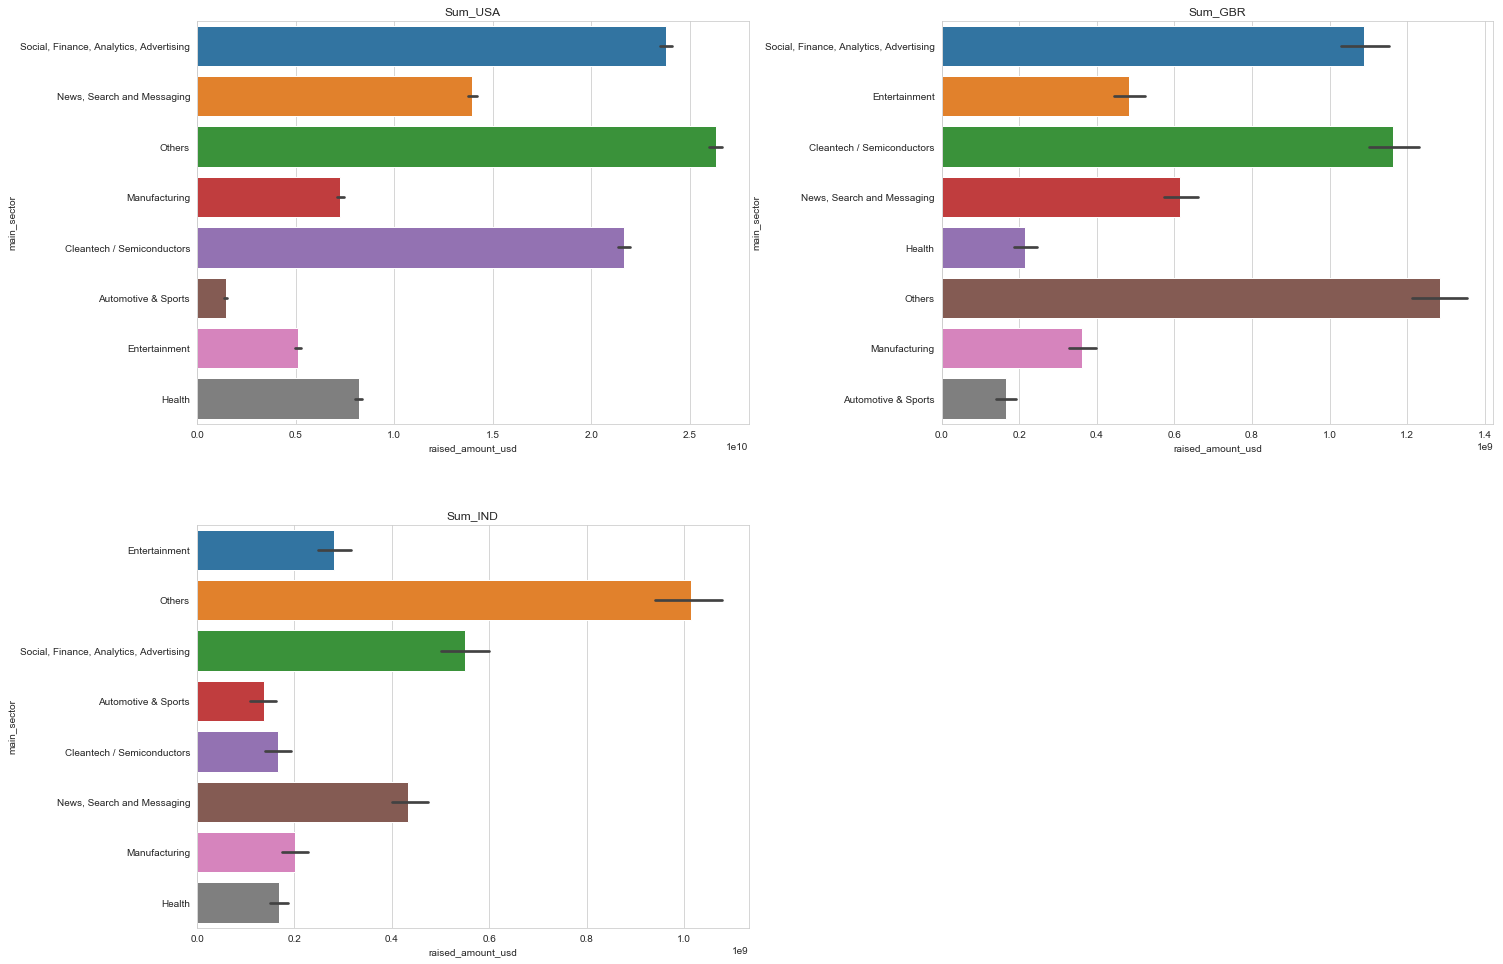

In [474]:
# United States of America (USA)

plt.figure(figsize=(20,15))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=1.00, hspace=0.25,
                    wspace=0.35)
plt.subplot(2,2,1)
sns.barplot(x="raised_amount_usd", y="main_sector", data=d1, estimator=sum)
plt.title("Sum_USA")

# United Kingdom(GBR)
plt.subplot(2,2,2)
sns.barplot(x="raised_amount_usd", y="main_sector", data=d2, estimator=sum)
plt.title("Sum_GBR")

# India (IND)
plt.subplot(2,2,3)
sns.barplot(x="raised_amount_usd", y="main_sector", data=d3, estimator=sum)
plt.title("Sum_IND")
plt.show()


# Checkpoint 6 : Plots

### Plot 1 and Plot 2 are plotted simulatneously with respective analysis above

In [475]:
d1 = d1[d1['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising", "Cleantech / Semiconductors"])]
d2 = d2[d2['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","Cleantech / Semiconductors"])]
d3 = d3[d3['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","News, Search and Messaging"])]

### Plot 3 (Checkpoint 6)

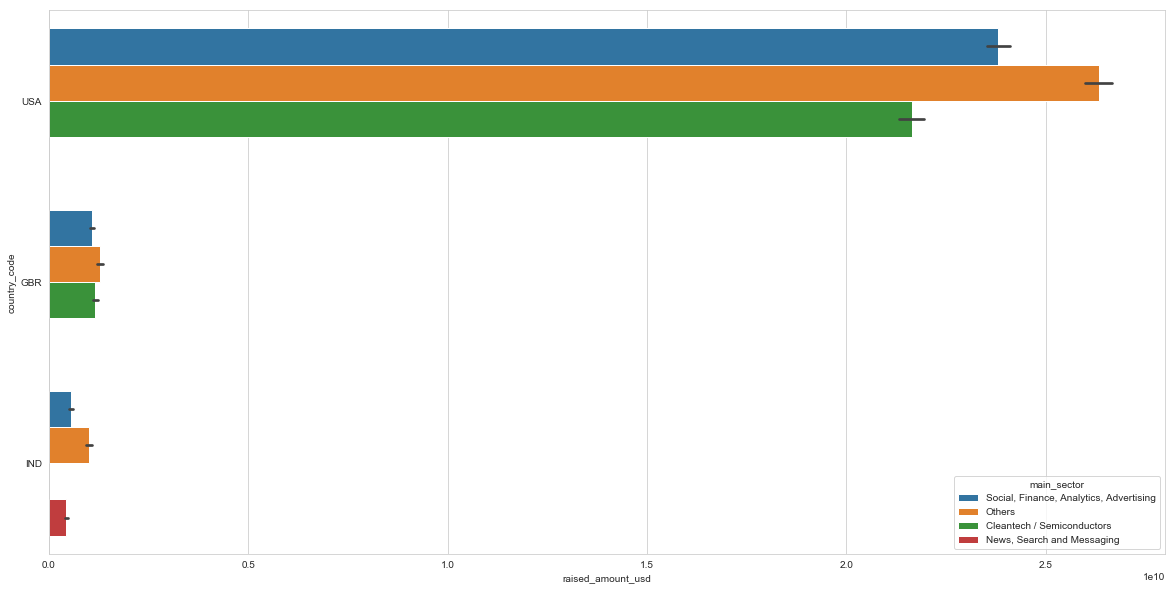

In [476]:
#Plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).
frames = [d1, d2, d3]
top3_result = pd.concat(frames)
plt.figure(figsize=(20, 10))
sns.barplot(x='raised_amount_usd', y='country_code', hue="main_sector", data=top3_result, estimator=np.sum)
plt.show()